In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
import time
import warnings

# sql and datetime imports and graphing func
from sqlalchemy import create_engine
from datetime import datetime, timedelta

In [11]:
# create sql engine for stock database
engineStocks = create_engine("sqlite:///stocks.db")
# assign the database to pandas df
stocks_df = pd.read_sql('''SELECT * FROM "stocks_table"''', engineStocks)
# create sql engine for spy database
engineSpy = create_engine("sqlite:///spy.db")
# assign the database to pandas df
spy_df = pd.read_sql('''SELECT * FROM "spy_table"''', engineSpy)

In [12]:
# merge stocks_df and spy_df
df = pd.merge(stocks_df, spy_df, left_on=['dateBreachedF1'], right_on=['full_date'], how='left')

In [14]:
## transform the data so it is ready for modeling
# make sure year column is float
df['year'] = df['year'].astype(float)
# remove the year from the month and return month only as an int
df['monthDigit'] = df['month'].apply(lambda x: int(x.split('-')[1]))
# drop column not needed
df = df.drop('dateBreachedF1', axis=1)
# turn target column into binary variables
df['target'] = df['target'].apply(lambda x: 1 if x == 'Success' or x == 'StillWorking' else 0)
# move the target column to the first position (out of the middle)
first_col = df.pop('target')
df.insert(0, 'target', first_col)
# remove any rows with risk greater than 100% and less than 0%
df = df[(df['perRisk'] <= 100) & (df['perRisk'] >= 0)]
# drop not needed columns and highly correlated columns
df = df.drop(['revStratUp', 'month', 'ticker'], axis=1)
# remove all np.inf variables from the dataframe so the data can be modeleded properly
df = df.replace([np.inf, -np.inf], np.nan).dropna(axis=0)
df['year'] = df['year'].astype(int)

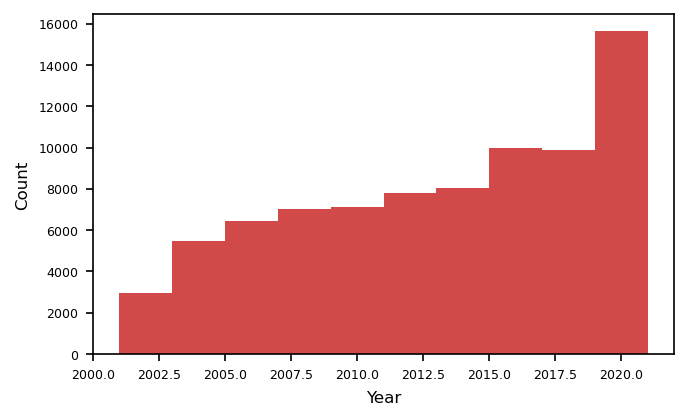

In [15]:
# line graph of mean salary by company age
plt.figure(figsize=(5,3), dpi=150)
plt.tick_params(labelsize=6)
plt.xlabel("Year", fontsize=8)
plt.ylabel("Count", fontsize=8)
plt.hist(x=df['year'], color='#d14949');

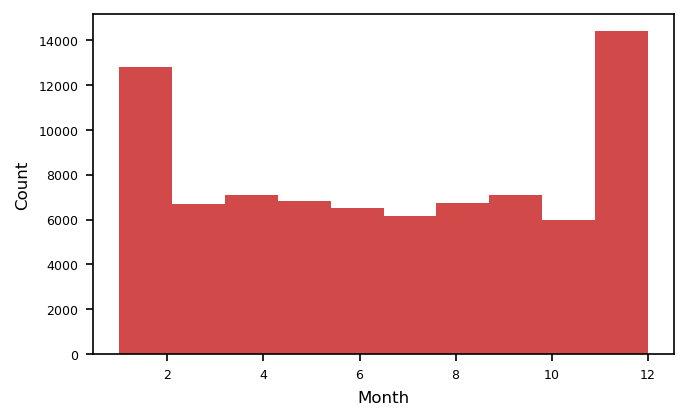

In [16]:
# line graph of mean salary by company age
plt.figure(figsize=(5,3), dpi=150)
plt.tick_params(labelsize=6)
plt.xlabel("Month", fontsize=8)
plt.ylabel("Count", fontsize=8)
plt.hist(x=df['monthDigit'], color='#d14949');

In [18]:
df.combo.value_counts()

1        34282
PMG      16299
22U       9165
31        6960
32U       4777
11        3887
12U       3271
312U       879
2xHam      629
111        242
Name: combo, dtype: int64

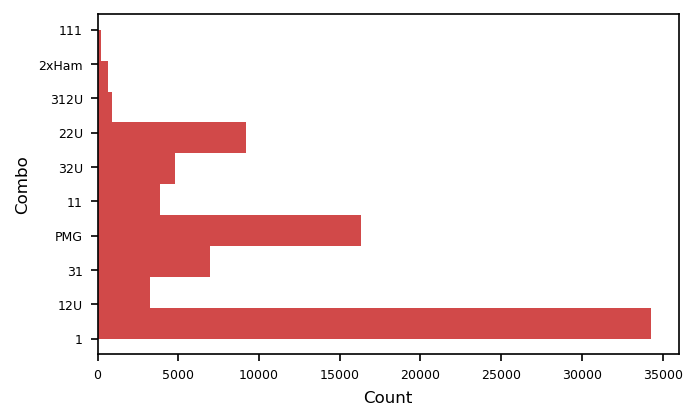

In [19]:
# line graph of mean salary by company age
plt.figure(figsize=(5,3), dpi=150)
plt.tick_params(labelsize=6)
plt.xlabel("Count", fontsize=8)
plt.ylabel("Combo", fontsize=8)
plt.hist(x=df['combo'], color='#d14949', align='mid', orientation='horizontal');

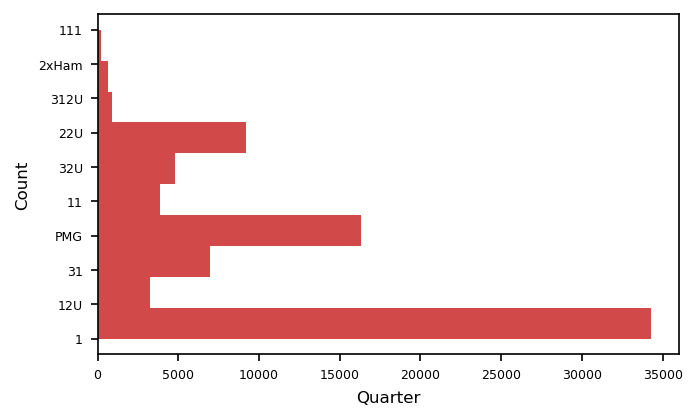

In [20]:
# line graph of mean salary by company age
plt.figure(figsize=(5,3), dpi=150)
plt.tick_params(labelsize=6)
plt.xlabel("Quarter", fontsize=8)
plt.ylabel("Count", fontsize=8)
plt.hist(x=df['combo'], color='#d14949', align='mid', orientation='horizontal');

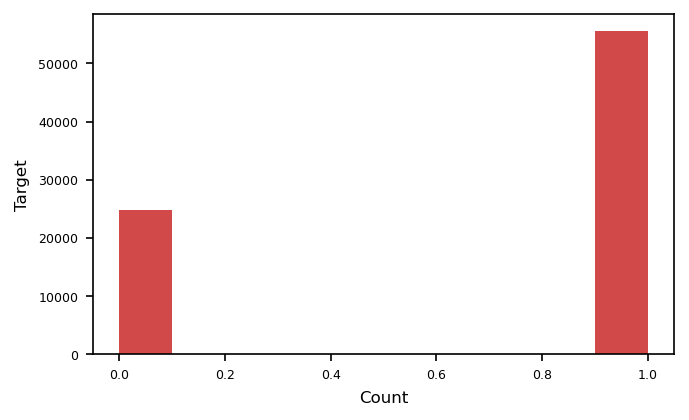

In [21]:
# line graph of mean salary by company age
plt.figure(figsize=(5,3), dpi=150)
plt.tick_params(labelsize=6)
plt.xlabel("Count", fontsize=8)
plt.ylabel("Target", fontsize=8)
plt.hist(x=df['target'], color='#d14949', align='mid', orientation='vertical');

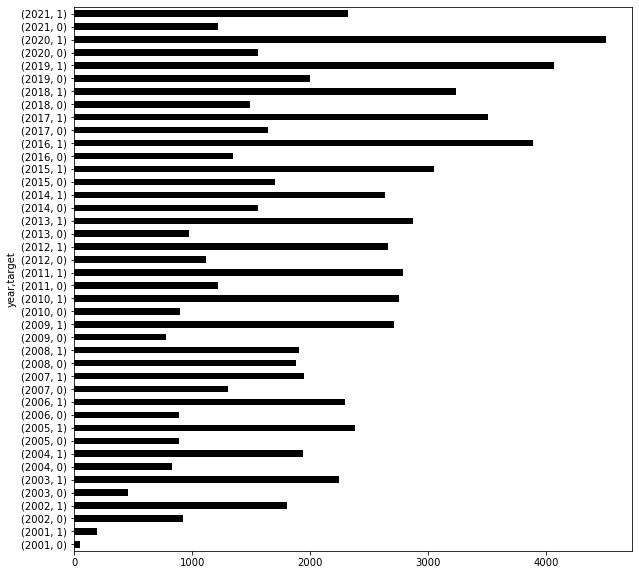

In [75]:
groups = df.groupby(['year', 'target']).size()
groups.plot.barh(figsize=(10,10), color='k');

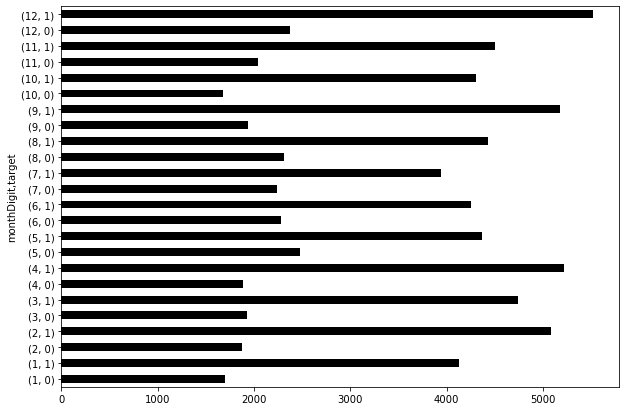

In [76]:
groups = df.groupby(['monthDigit', 'target']).size()
groups.plot.barh(figsize=(10,7), color='k');

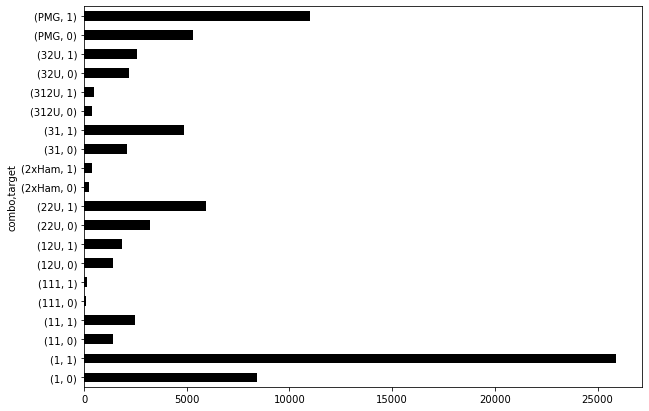

In [77]:
groups = df.groupby(['combo', 'target']).size()
groups.plot.barh(figsize=(10,7), color='k');

In [74]:
pd.pivot_table(df, index=['year'], values='target').sort_values('target', ascending=False)

,target
year,
2003,0.830986
2001,0.795181
2009,0.776282
2010,0.753909
2013,0.747264
2016,0.743266
2020,0.742984
2005,0.728637
2006,0.719761


In [80]:
df_pivots = df[['year', 'quarter', 'yearStuck', 'yearGreen', 'pivotGreenYear',
       'quarterStuck', 'quarterGreen', 'pivotGreenQuarter', 'mgbuy',
       'timeBreached', 'threeMoLow', 'sixMoLow', 'threeMoHigh', 'sixMoHigh',
       'stuckInTheMiddle', 'cmpndStuck', 'stuck', 'combo', 'spyMoStuck',
       'spyMoGreen', 'spyMoAbovePivot', 'spyQtrStuck', 'spyQtrGreen',
       'spyQtrAbovePivot', 'spyYrStuck', 'spyYrGreen', 'spyYrAbovePivot',
       'monthDigit']]
# NOTE TO FUTURE SELF: can't have 'projected_salaries' in df_pivots, \
# otherwise it will return a value error \
# because it will have assigned same values into both \
# for loop to check out a series of pivot table relationships \
for i in df_pivots.columns:
    print(pd.pivot_table(df, index=i, values='target', aggfunc='mean').sort_values('target', ascending=False))

        target
year          
2003  0.830986
2001  0.795181
2009  0.776282
2010  0.753909
2013  0.747264
2016  0.743266
2020  0.742984
2005  0.728637
2006  0.719761
2012  0.703576
2004  0.699278
2011  0.695283
2018  0.684244
2017  0.681033
2019  0.670074
2002  0.662381
2021  0.655747
2015  0.641760
2014  0.628135
2007  0.598154
2008  0.503696
           target
quarter          
1.0      0.717156
4.0      0.701685
3.0      0.676403
2.0      0.675422
             target
yearStuck          
1.0        0.706620
0.0        0.686002
             target
yearGreen          
1.0        0.716280
0.0        0.670876
                  target
pivotGreenYear          
1.0             0.722041
0.0             0.651385
                target
quarterStuck          
1.0           0.721284
0.0           0.674811
               target
quarterGreen         
1.0           0.72271
0.0           0.66614
                     target
pivotGreenQuarter          
1.0                0.729105
0.0                0.61

In [66]:
df_pivots = df[['year', 'quarter', 'combo', 'monthDigit']]
# NOTE TO FUTURE SELF: can't have 'projected_salaries' in df_pivots, \
# otherwise it will return a value error \
# because it will have assigned same values into both \
# for loop to check out a series of pivot table relationships \
for i in df_pivots.columns:
    print(pd.pivot_table(df[df.target == 1], index=i, values='target', aggfunc='count').sort_values('target', ascending=False))

      target
year        
2020    4501
2019    4064
2016    3891
2017    3508
2018    3231
2015    3049
2013    2868
2011    2786
2010    2748
2009    2710
2012    2656
2014    2630
2005    2379
2021    2322
2006    2291
2003    2242
2007    1944
2004    1937
2008    1908
2002    1803
2001     198
         target
quarter        
4.0       14327
1.0       13958
2.0       13834
3.0       13547
       target
combo        
1       25876
PMG     11016
22U      5948
31       4881
32U      2600
11       2469
12U      1851
312U      475
2xHam     397
111       153
            target
monthDigit        
12            5516
4             5222
9             5178
2             5084
3             4744
11            4506
8             4428
5             4362
10            4305
6             4250
1             4130
7             3941
